LOADING OF DATA

In [102]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 100)
plt.rcParams["figure.figsize"] = (8,4)

# raw CSV file
RAW_PATH = "data/ada_focus.csv"   # put your file here
df = pd.read_csv(RAW_PATH)

# we drop the first column as it is Google Forms timestamp
df = df.drop(columns=df.columns[0])

# quick check
df.head()

,Approximately how many hours did you spend studying during your most recent study period?,At what time of day did this study period take place?,How many hours did you sleep the night before this study period?,How many cups of coffee or energy drinks did you consume before or during this study period?,Did you listen to music while studying?,Where did you study during this study period?,Were you studying alone or with others?,"Overall, how would you rate your level of focus during this study period?"
0,1-2 hours,"Afternoon, Evening",5,1-2,No,Home,Alone,4
1,8+,"Evening, Night",4,1-2,Yes,Home,Alone,3
2,2-6 hours,Morning,7,1-2,No,Library,With others,4
3,8+,Afternoon,6,2-4,Yes,Cafe,With others,2
4,1-2 hours,Evening,6,1-2,No,Home,Alone,3


In [103]:
# here we rename columns
df = df.rename(columns={
    df.columns[0]: "study_duration_hours_bin",
    df.columns[1]: "time_of_day",
    df.columns[2]: "sleep_hours",
    df.columns[3]: "coffee_cups_bin",
    df.columns[4]: "music_on",
    df.columns[5]: "location",
    df.columns[6]: "group_study",
    df.columns[7]: "focus_level_1to5"
})
df.head()

,study_duration_hours_bin,time_of_day,sleep_hours,coffee_cups_bin,music_on,location,group_study,focus_level_1to5
0,1-2 hours,"Afternoon, Evening",5,1-2,No,Home,Alone,4
1,8+,"Evening, Night",4,1-2,Yes,Home,Alone,3
2,2-6 hours,Morning,7,1-2,No,Library,With others,4
3,8+,Afternoon,6,2-4,Yes,Cafe,With others,2
4,1-2 hours,Evening,6,1-2,No,Home,Alone,3


EDA

In [104]:
# dataset overview
print("Shape:", df.shape)
display(df.head())

# types and non-null counts
df.info()

Shape: (100, 8)


,study_duration_hours_bin,time_of_day,sleep_hours,coffee_cups_bin,music_on,location,group_study,focus_level_1to5
0,1-2 hours,"Afternoon, Evening",5,1-2,No,Home,Alone,4
1,8+,"Evening, Night",4,1-2,Yes,Home,Alone,3
2,2-6 hours,Morning,7,1-2,No,Library,With others,4
3,8+,Afternoon,6,2-4,Yes,Cafe,With others,2
4,1-2 hours,Evening,6,1-2,No,Home,Alone,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   study_duration_hours_bin  100 non-null    object
 1   time_of_day               100 non-null    object
 2   sleep_hours               100 non-null    int64 
 3   coffee_cups_bin           100 non-null    object
 4   music_on                  100 non-null    object
 5   location                  100 non-null    object
 6   group_study               100 non-null    object
 7   focus_level_1to5          100 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 6.4+ KB


In [105]:
# describtion of numeric columns
display(df[["sleep_hours","focus_level_1to5"]].describe(include="all"))

,sleep_hours,focus_level_1to5
count,100.0000,100.00000
mean,6.6500,3.86000
std,1.7019,0.75237
min,1.0000,2.00000
25%,6.0000,4.00000
50%,7.0000,4.00000
75%,8.0000,4.00000
max,9.0000,5.00000


In [106]:
# missing values check
df.isna().sum()

study_duration_hours_bin    0
time_of_day                 0
sleep_hours                 0
coffee_cups_bin             0
music_on                    0
location                    0
group_study                 0
focus_level_1to5            0
dtype: int64

In [107]:
# categorical features check
for col in ["study_duration_hours_bin","coffee_cups_bin","time_of_day","location","music_on","group_study"]:
    print(f"\n=== {col} ===")
    print(df[col].value_counts(dropna=False))


=== study_duration_hours_bin ===
study_duration_hours_bin
2-6 hours    47
1-2 hours    27
8+           26
Name: count, dtype: int64

=== coffee_cups_bin ===
coffee_cups_bin
1-2         65
2-4         24
4+           8
2-4, 4+      2
1-2, 2-4     1
Name: count, dtype: int64

=== time_of_day ===
time_of_day
Night                 38
Morning               22
Evening               19
Afternoon             13
Afternoon, Evening     2
Evening, Night         2
Afternoon, Night       2
Morning, Afternoon     2
Name: count, dtype: int64

=== location ===
location
Home       34
Cafe       28
Library    26
Dorm        7
Other       5
Name: count, dtype: int64

=== music_on ===
music_on
Yes    56
No     44
Name: count, dtype: int64

=== group_study ===
group_study
Alone          79
With others    21
Name: count, dtype: int64


focus_level_1to5
2     6
3    18
4    60
5    16
Name: count, dtype: int64


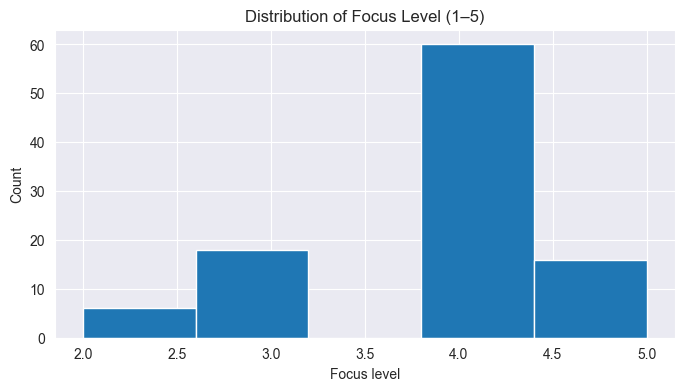

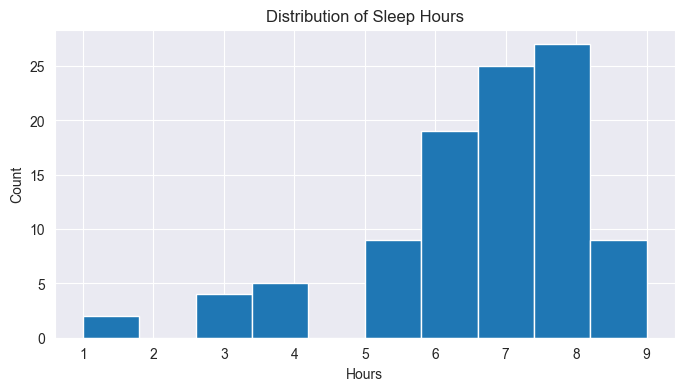

In [108]:
# our target distribution will be focus level required for our project
print(df["focus_level_1to5"].value_counts().sort_index())

# histogram for our target value
tmp_target = pd.to_numeric(df["focus_level_1to5"], errors="coerce") # formatting
tmp_target.hist(bins=5) # histogram with 5 buckets
plt.title("Distribution of Focus Level (1–5)")
plt.xlabel("Focus level"); plt.ylabel("Count"); plt.show()

# sleep hours distribution
tmp_sleep = pd.to_numeric(df["sleep_hours"], errors="coerce")
tmp_sleep.hist(bins=10)
plt.title("Distribution of Sleep Hours")
plt.xlabel("Hours"); plt.ylabel("Count"); plt.show()

DATA PREPROCESSING

In [109]:
# here we are cleaning coffee multi-selections like 2-4, 4+ to single values
def normalize_coffee_bin(x):
    if pd.isna(x):
        return np.nan
    parts = [p.strip() for p in str(x).split(",")]
    order = ["1-2", "2-4", "4+"]
    for level in reversed(order): # we check first high values cause there are less of them
        if level in parts: # like a max value filter, if person choose 1-2+ and 4+ it wll be 4+
            return level
    return np.nan

df["coffee_cups_bin_clean"] = df["coffee_cups_bin"].apply(normalize_coffee_bin) # saves results in a new column
df["coffee_cups_bin_clean"].value_counts(dropna=False)

coffee_cups_bin_clean
1-2    65
2-4    25
4+     10
Name: count, dtype: int64

In [110]:
# normalization of duration because we have 1-2 hours and we need to make 1-2
def normalize_duration_bin(x):
    if pd.isna(x):
        return np.nan
    parts = [p.strip().lower().replace(" hours", "") for p in str(x).split(",")]
    order = ["1-2", "2-6", "8+"] # again from high to low
    for level in reversed(order):
        if level in parts:
            return level
    return np.nan

df["study_duration_hours_bin_clean"] = df["study_duration_hours_bin"].apply(normalize_duration_bin)
df["study_duration_hours_bin_clean"].value_counts(dropna=False)

study_duration_hours_bin_clean
2-6    47
1-2    27
8+     26
Name: count, dtype: int64

In [111]:
# normalization of times of the day because we have multi answers in the form
def normalize_time_of_day(x):
    if pd.isna(x):
        return np.nan

    parts = [p.strip() for p in str(x).split(",")]

    # we made a priority from earliest to latest
    order = ["Morning", "Afternoon", "Evening", "Night"]

    #latest selected time
    for level in reversed(order):
        if level in parts:
            return level

    return np.nan

df["time_of_day_clean"] = df["time_of_day"].apply(normalize_time_of_day)
df["time_of_day_clean"].value_counts(dropna=False)

time_of_day_clean
Night        42
Morning      22
Evening      21
Afternoon    15
Name: count, dtype: int64

In [112]:
df = df.drop(columns=["coffee_cups_bin", "study_duration_hours_bin", "time_of_day"])

df = df.rename(columns={"coffee_cups_bin_clean": "coffee_cups_bin", "study_duration_hours_bin_clean": "study_duration_hours_bin", "time_of_day_clean": "time_of_day"})

df.head()

,sleep_hours,music_on,location,group_study,focus_level_1to5,coffee_cups_bin,study_duration_hours_bin,time_of_day
0,5,No,Home,Alone,4,1-2,1-2,Evening
1,4,Yes,Home,Alone,3,1-2,8+,Night
2,7,No,Library,With others,4,1-2,2-6,Morning
3,6,Yes,Cafe,With others,2,2-4,8+,Afternoon
4,6,No,Home,Alone,3,1-2,1-2,Evening


In [113]:
# mapping of the values that we have to average values for efficiency
duration_map = {"1-2": 1.5, "2-6": 4.0, "8+": 8.5}

coffee_map = {"1-2": 1.5, "2-4": 3.0, "4+": 4.5}

df["study_duration_hours"] = df["study_duration_hours_bin"].map(duration_map)
df["coffee_cups"] = df["coffee_cups_bin"].map(coffee_map)
df[["study_duration_hours_bin", "study_duration_hours", "coffee_cups_bin", "coffee_cups"]].head()

,study_duration_hours_bin,study_duration_hours,coffee_cups_bin,coffee_cups
0,1-2,1.5,1-2,1.5
1,8+,8.5,1-2,1.5
2,2-6,4.0,1-2,1.5
3,8+,8.5,2-4,3.0
4,1-2,1.5,1-2,1.5


In [114]:
# converting data types to numeric in case of some problems
df["sleep_hours"] = pd.to_numeric(df["sleep_hours"], errors="coerce")
df["study_duration_hours"] = pd.to_numeric(df["study_duration_hours"], errors="coerce")
df["coffee_cups"] = pd.to_numeric(df["coffee_cups"], errors="coerce")
df["focus_level_1to5"] = pd.to_numeric(df["focus_level_1to5"], errors="coerce")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sleep_hours               100 non-null    int64  
 1   music_on                  100 non-null    object 
 2   location                  100 non-null    object 
 3   group_study               100 non-null    object 
 4   focus_level_1to5          100 non-null    int64  
 5   coffee_cups_bin           100 non-null    object 
 6   study_duration_hours_bin  100 non-null    object 
 7   time_of_day               100 non-null    object 
 8   study_duration_hours      100 non-null    float64
 9   coffee_cups               100 non-null    float64
dtypes: float64(2), int64(2), object(6)
memory usage: 7.9+ KB


In [115]:
# turning all string values to number ones
df["music_on"] = df["music_on"].map({"Yes": 1, "No": 0})
df["group_study"] = df["group_study"].map({"Alone": 0, "With others": 1})

In [116]:
# we create separate column and indicate the focus level
def focus_class(x):
    if x <= 2:
        return "Low"
    elif x == 3:
        return "Medium"
    else:
        return "High"

df["focus_class"] = df["focus_level_1to5"].apply(focus_class)
df["focus_class"].value_counts()
df.head()

,sleep_hours,music_on,location,group_study,focus_level_1to5,coffee_cups_bin,study_duration_hours_bin,time_of_day,study_duration_hours,coffee_cups,focus_class
0,5,0,Home,0,4,1-2,1-2,Evening,1.5,1.5,High
1,4,1,Home,0,3,1-2,8+,Night,8.5,1.5,Medium
2,7,0,Library,1,4,1-2,2-6,Morning,4.0,1.5,High
3,6,1,Cafe,1,2,2-4,8+,Afternoon,8.5,3.0,Low
4,6,0,Home,0,3,1-2,1-2,Evening,1.5,1.5,Medium


In [117]:
# here we drop the unnecessary columns and only have the final ones
df = df.drop(columns=["coffee_cups_bin","study_duration_hours_bin"])

df.columns

Index(['sleep_hours', 'music_on', 'location', 'group_study',
       'focus_level_1to5', 'time_of_day', 'study_duration_hours',
       'coffee_cups', 'focus_class'],
      dtype='object')

In [118]:
df.head()

,sleep_hours,music_on,location,group_study,focus_level_1to5,time_of_day,study_duration_hours,coffee_cups,focus_class
0,5,0,Home,0,4,Evening,1.5,1.5,High
1,4,1,Home,0,3,Night,8.5,1.5,Medium
2,7,0,Library,1,4,Morning,4.0,1.5,High
3,6,1,Cafe,1,2,Afternoon,8.5,3.0,Low
4,6,0,Home,0,3,Evening,1.5,1.5,Medium


focus_level_1to5
2     6
3    18
4    60
5    16
Name: count, dtype: int64


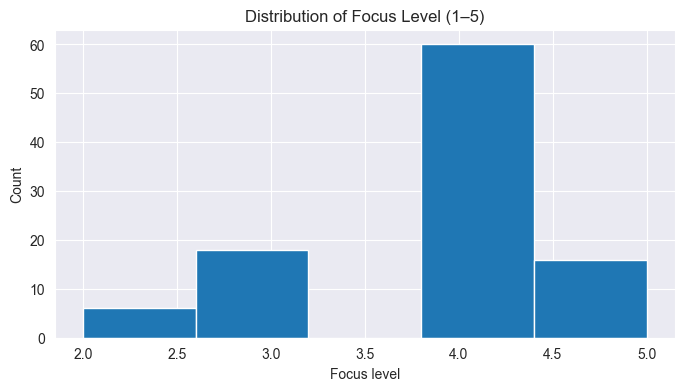

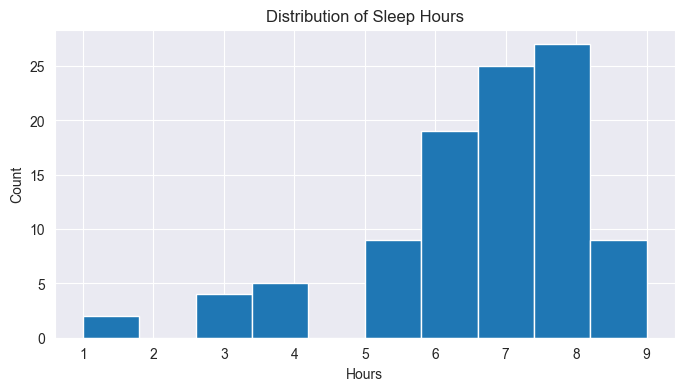

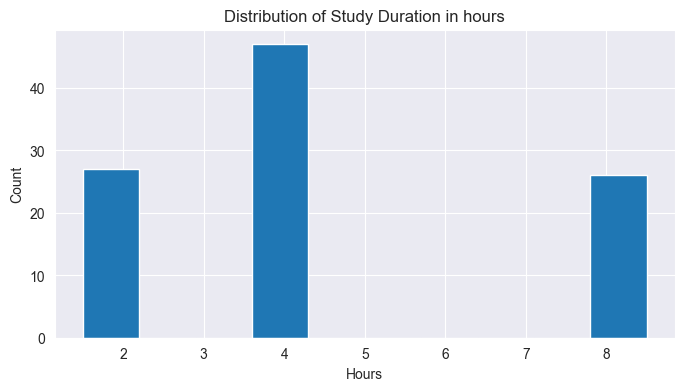

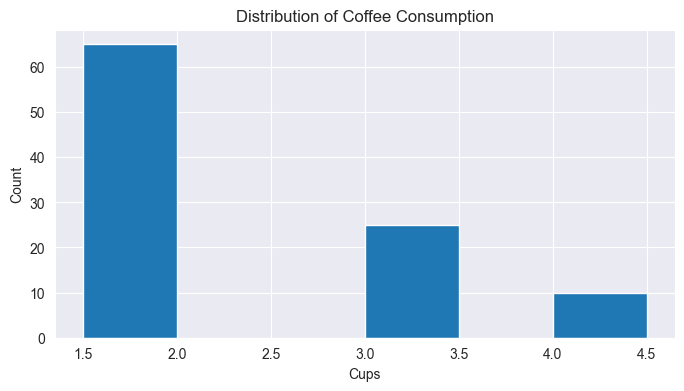

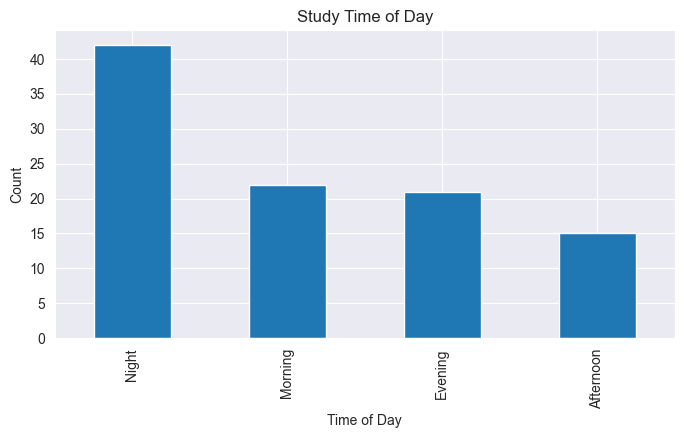

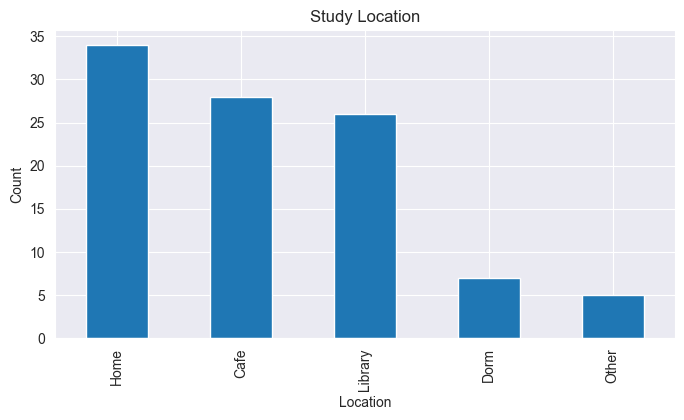

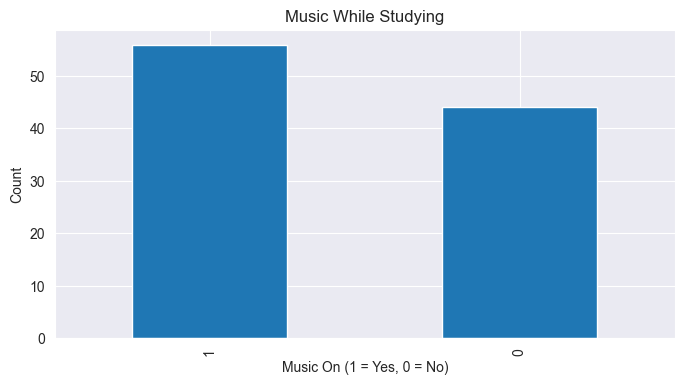

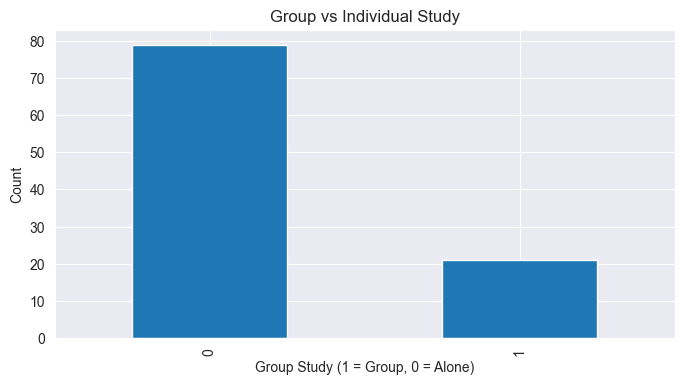

In [119]:
print(df["focus_level_1to5"].value_counts().sort_index())

tmp_target = pd.to_numeric(df["focus_level_1to5"], errors="coerce")
tmp_target.hist(bins=5)
plt.title("Distribution of Focus Level (1–5)")
plt.xlabel("Focus level")
plt.ylabel("Count")
plt.show()

tmp_sleep = pd.to_numeric(df["sleep_hours"], errors="coerce")
tmp_sleep.hist(bins=10)
plt.title("Distribution of Sleep Hours")
plt.xlabel("Hours")
plt.ylabel("Count")
plt.show()

df["study_duration_hours"].hist(bins=10)
plt.title("Distribution of Study Duration in hours")
plt.xlabel("Hours")
plt.ylabel("Count")
plt.show()

df["coffee_cups"].hist(bins=6)
plt.title("Distribution of Coffee Consumption")
plt.xlabel("Cups")
plt.ylabel("Count")
plt.show()

df["time_of_day"].value_counts().plot(kind="bar")
plt.title("Study Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Count")
plt.show()

df["location"].value_counts().plot(kind="bar")
plt.title("Study Location")
plt.xlabel("Location")
plt.ylabel("Count")
plt.show()

df["music_on"].value_counts().plot(kind="bar")
plt.title("Music While Studying")
plt.xlabel("Music On (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

df["group_study"].value_counts().plot(kind="bar")
plt.title("Group vs Individual Study")
plt.xlabel("Group Study (1 = Group, 0 = Alone)")
plt.ylabel("Count")
plt.show()

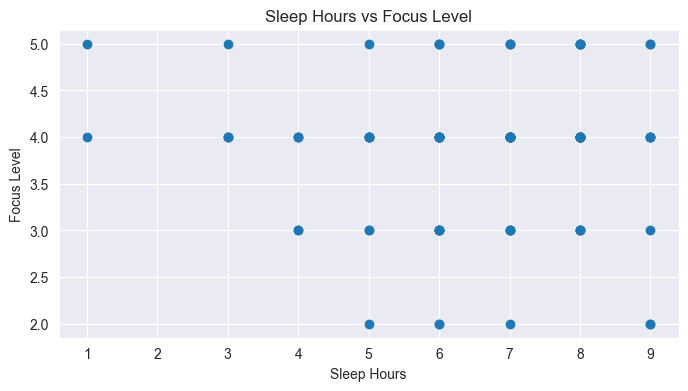

In [120]:
# Relationship between sleep hours and focus level
plt.scatter(df["sleep_hours"], df["focus_level_1to5"])
plt.xlabel("Sleep Hours")
plt.ylabel("Focus Level")
plt.title("Sleep Hours vs Focus Level")
plt.show()

In [121]:
# some correlation analyzes between the numeric values
numeric_cols = ["sleep_hours", "study_duration_hours", "coffee_cups", "music_on", "group_study", "focus_level_1to5"]

df[numeric_cols].corr()

,sleep_hours,study_duration_hours,coffee_cups,music_on,group_study,focus_level_1to5
sleep_hours,1.000000,-0.132649,-0.302352,-0.207003,0.034072,-0.014988
study_duration_hours,-0.132649,1.000000,0.050360,0.095521,0.019955,0.074428
coffee_cups,-0.302352,0.050360,1.000000,0.114437,-0.016516,0.105835
music_on,-0.207003,0.095521,0.114437,1.000000,-0.037590,-0.031217
group_study,0.034072,0.019955,-0.016516,-0.037590,1.000000,0.030829
focus_level_1to5,-0.014988,0.074428,0.105835,-0.031217,0.030829,1.000000


MODELLING

In [122]:
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
)
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [123]:
# here we frame the problem as a supervised classification task predicting student focus level
X = df[["sleep_hours", "study_duration_hours", "coffee_cups", "music_on", "group_study", "location", "time_of_day",]]
y = df["focus_class"]  # our classification target

X.head(), y.value_counts()

(   sleep_hours  study_duration_hours  coffee_cups  music_on  group_study  \
 0            5                   1.5          1.5         0            0   
 1            4                   8.5          1.5         1            0   
 2            7                   4.0          1.5         0            1   
 3            6                   8.5          3.0         1            1   
 4            6                   1.5          1.5         0            0   
 
   location time_of_day  
 0     Home     Evening  
 1     Home       Night  
 2  Library     Morning  
 3     Cafe   Afternoon  
 4     Home     Evening  ,
 focus_class
 High      76
 Medium    18
 Low        6
 Name: count, dtype: int64)

In [124]:
from sklearn.model_selection import train_test_split
# here we do the train and test split for better data evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

X_train.shape, X_test.shape

((75, 7), (25, 7))

In [125]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# here we scale the data, scaling is applied to numeric features, while categorical features are one-hot encoded
numeric_features = ["sleep_hours", "study_duration_hours", "coffee_cups", "music_on", "group_study"]

categorical_features = ["location", "time_of_day"]

preprocessor = ColumnTransformer(transformers=[("num", StandardScaler(), numeric_features), ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)]) # we scale it so one values does not dominate other, and so that we do not confue the model we do one hot encoding

In [126]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

# baseline model dummy classifier in order to see that the model actually learned something
dummy = Pipeline(steps=[("preprocess", preprocessor), ("model", DummyClassifier(strategy="most_frequent"))])

dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)

print("Dummy Classifier Results")
print(classification_report(y_test, y_pred_dummy))

Dummy Classifier Results
              precision    recall  f1-score   support

        High       0.76      1.00      0.86        19
         Low       0.00      0.00      0.00         2
      Medium       0.00      0.00      0.00         4

    accuracy                           0.76        25
   macro avg       0.25      0.33      0.29        25
weighted avg       0.58      0.76      0.66        25



C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [127]:
from sklearn.linear_model import LogisticRegression

# logistic regression
log_reg = Pipeline(steps=[("preprocess", preprocessor), ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))])

log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Results")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Results
              precision    recall  f1-score   support

        High       1.00      0.32      0.48        19
         Low       0.25      1.00      0.40         2
      Medium       0.09      0.25      0.13         4

    accuracy                           0.36        25
   macro avg       0.45      0.52      0.34        25
weighted avg       0.79      0.36      0.42        25



In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# decision tree with tuning
dt = Pipeline(steps=[("preprocess", preprocessor), ("model", DecisionTreeClassifier(random_state=42))])

param_grid_dt = {"model__max_depth": [2, 3, 4, 5, None], "model__min_samples_split": [2, 5, 10]} # 15 models

grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring="f1_macro") # we need f1 macro to check all 3 classes

grid_dt.fit(X_train, y_train)

print("Best Decision Tree Parameters:", grid_dt.best_params_)

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Decision Tree Parameters: {'model__max_depth': 4, 'model__min_samples_split': 5}


In [129]:
# hyperparameter tuning used to control overfitting.
best_dt = grid_dt.best_estimator_ # gets the best out of 15 models
y_pred_dt = best_dt.predict(X_test) # we check it on the testing part

print("Decision Tree Results")
print(classification_report(y_test, y_pred_dt))

Decision Tree Results
              precision    recall  f1-score   support

        High       0.79      0.58      0.67        19
         Low       0.00      0.00      0.00         2
      Medium       0.20      0.50      0.29         4

    accuracy                           0.52        25
   macro avg       0.33      0.36      0.32        25
weighted avg       0.63      0.52      0.55        25



In [130]:
from sklearn.ensemble import RandomForestClassifier

# random forest
rf = Pipeline(steps=[("preprocess", preprocessor),("model", RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced"))]) # for tree we like had one person, for random now we have 200 so no mistakes can be

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))

Random Forest Results
              precision    recall  f1-score   support

        High       0.82      0.95      0.88        19
         Low       1.00      0.50      0.67         2
      Medium       0.00      0.00      0.00         4

    accuracy                           0.76        25
   macro avg       0.61      0.48      0.51        25
weighted avg       0.70      0.76      0.72        25



In [131]:
from sklearn.metrics import f1_score, accuracy_score

# now we analyze the results of four models tested
results = pd.DataFrame(
    {
        "Model": [
            "Dummy",
            "Logistic Regression",
            "Decision Tree",
            "Random Forest",
        ],
        "Accuracy": [
            accuracy_score(y_test, y_pred_dummy),
            accuracy_score(y_test, y_pred_lr),
            accuracy_score(y_test, y_pred_dt),
            accuracy_score(y_test, y_pred_rf),
        ],
        "F1_macro": [
            f1_score(y_test, y_pred_dummy, average="macro"),
            f1_score(y_test, y_pred_lr, average="macro"),
            f1_score(y_test, y_pred_dt, average="macro"),
            f1_score(y_test, y_pred_rf, average="macro"),
        ]
    }
)

results

,Model,Accuracy,F1_macro
0,Dummy,0.76,0.287879
1,Logistic Regression,0.36,0.337778
2,Decision Tree,0.52,0.317460
3,Random Forest,0.76,0.514905


PREDICTION

In [132]:
final_model = rf  # we choose random forest pipeline because of its f1 score

# study scenario where we manually can put values
example_input = pd.DataFrame(
    {
        "sleep_hours": [7],
        "study_duration_hours": [3],
        "coffee_cups": [2],
        "music_on": [1],
        "group_study": [0],
        "location": ["Library"],
        "time_of_day": ["Evening"],
    }
)

example_input

,sleep_hours,study_duration_hours,coffee_cups,music_on,group_study,location,time_of_day
0,7,3,2,1,0,Library,Evening


In [133]:
predicted_focus = final_model.predict(example_input)[0]
predicted_probs = final_model.predict_proba(example_input)

for cls, prob in zip(final_model.named_steps["model"].classes_, predicted_probs[0]):
    print(f"{cls}: {prob:.2f}")
print("Predicted focus level:", predicted_focus)

High: 0.58
Low: 0.07
Medium: 0.35
Predicted focus level: High


MLOps - Experiment

In [134]:
import mlflow
import mlflow.sklearn
mlflow.set_experiment("ADA_Student_Focus_Prediction")

<Experiment: artifact_location='file:///C:/Users/ASUS/PycharmProjects/Python/ML/course/project/mlruns/1', creation_time=1765865269025, experiment_id='1', last_update_time=1765865269025, lifecycle_stage='active', name='ADA_Student_Focus_Prediction', tags={}>

In [135]:
from sklearn.metrics import accuracy_score, f1_score

def run_experiment(model, model_name, X_train, X_test, y_train, y_test):
    with mlflow.start_run(run_name=model_name):

        # first we train the model
        model.fit(X_train, y_train)

        # prediction
        y_pred = model.predict(X_test)

        # several metrics
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="macro")

        # log parameters
        mlflow.log_param("model_type", model_name)

        if hasattr(model.named_steps["model"], "get_params"): # python safety check has attribute
            for k, v in model.named_steps["model"].get_params().items():
                mlflow.log_param(k, v)

        # log metrics
        mlflow.log_metric("accuracy", acc)
        mlflow.log_metric("f1_macro", f1)

        # log model
        mlflow.sklearn.log_model(model, "model")

        print(f"{model_name} → Accuracy: {acc:.3f}, F1_macro: {f1:.3f}")

In [136]:
run_experiment(dummy, "Dummy", X_train, X_test, y_train, y_test)
run_experiment(log_reg, "Logistic_Regression", X_train, X_test, y_train, y_test)
run_experiment(best_dt, "Decision_Tree", X_train, X_test, y_train, y_test)
run_experiment(rf, "Random_Forest", X_train, X_test, y_train, y_test)

# you can check experiment by writing the mlflow ui in the terminal -> http://127.0.0.1:5000

2025/12/16 10:20:35 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/16 10:20:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Dummy → Accuracy: 0.760, F1_macro: 0.288


2025/12/16 10:20:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Logistic_Regression → Accuracy: 0.360, F1_macro: 0.338
Decision_Tree → Accuracy: 0.520, F1_macro: 0.317


2025/12/16 10:20:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Random_Forest → Accuracy: 0.760, F1_macro: 0.515
